In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

# import sys
# !{sys.executable} -m pip install pydotplus
import pydotplus
pd.set_option('display.max_columns', None)

C:\Users\Rishabh\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
rawData = pd.read_csv(r"C:\Users\Rishabh\Desktop\MSBA\CIS 508 Shangpil Han\Fraud Detection.csv")

In [3]:
rawData.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [4]:
rawData.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [59]:
print(rawData.dtypes)
rawData.rename(columns={"default.payment.next.month": "DefaultNextMonthFlag"})
IdVar = ["ID"]
OrdinalVar = ["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"] # There is no Pay_1
CategoricalVar = ["SEX","EDUCATION","MARRIAGE","default.payment.next.month"]
NumericAndFloat = [var for var in list(rawData.columns) if var not in IdVar+OrdinalVar+CategoricalVar]

for i in CategoricalVar+IdVar:
    rawData[i] = rawData[i].astype("category")

for i in CategoricalVar+IdVar+OrdinalVar:
    print (i, rawData[i].unique())

ID                                category
LIMIT_BAL                          float64
SEX                               category
EDUCATION                         category
MARRIAGE                          category
AGE                                  int64
PAY_0                                int64
PAY_2                                int64
PAY_3                                int64
PAY_4                                int64
PAY_5                                int64
PAY_6                                int64
BILL_AMT1                          float64
BILL_AMT2                          float64
BILL_AMT3                          float64
BILL_AMT4                          float64
BILL_AMT5                          float64
BILL_AMT6                          float64
PAY_AMT1                           float64
PAY_AMT2                           float64
PAY_AMT3                           float64
PAY_AMT4                           float64
PAY_AMT5                           float64
PAY_AMT6   

In [60]:
# Clean the education variable having multiple levels 

substitutables = (rawData.EDUCATION == 5) | (rawData.EDUCATION == 6) | (rawData.EDUCATION == 0)
rawData.loc[substitutables,'EDUCATION'] = 5
# Cleaning the Marriage Variable 
rawData.loc[rawData.MARRIAGE == 0, 'MARRIAGE'] = 3
# For Pay Vlues
for i in OrdinalVar:
    substitutables = (rawData[i] == -2) | (rawData[i] == -1) | (rawData[i] == 0)
    rawData.loc[substitutables, i] = 0
    
    
for i in CategoricalVar+IdVar+OrdinalVar:  
    print (i, rawData[i].unique())

rawData = rawData

SEX [Female, Male]
Categories (2, object): [Female, Male]
EDUCATION [2, 1, 3, 5, 4]
Categories (5, int64): [2, 1, 3, 5, 4]
MARRIAGE [1, 2, 3]
Categories (3, int64): [1, 2, 3]
default.payment.next.month [1, 0]
Categories (2, int64): [1, 0]
ID [1, 2, 3, 4, 5, ..., 29996, 29997, 29998, 29999, 30000]
Length: 30000
Categories (30000, int64): [1, 2, 3, 4, ..., 29997, 29998, 29999, 30000]
PAY_0 [2 0 1 3 4 8 7 5 6]
PAY_2 [2 0 3 5 7 4 1 6 8]
PAY_3 [0 2 3 4 6 7 1 5 8]
PAY_4 [0 2 3 4 5 7 6 1 8]
PAY_5 [0 2 3 5 4 7 8 6]
PAY_6 [0 2 3 6 4 7 8 5]


In [61]:
print(rawData.dtypes)   


ID                                category
LIMIT_BAL                          float64
SEX                               category
EDUCATION                         category
MARRIAGE                          category
AGE                                  int64
PAY_0                                int64
PAY_2                                int64
PAY_3                                int64
PAY_4                                int64
PAY_5                                int64
PAY_6                                int64
BILL_AMT1                          float64
BILL_AMT2                          float64
BILL_AMT3                          float64
BILL_AMT4                          float64
BILL_AMT5                          float64
BILL_AMT6                          float64
PAY_AMT1                           float64
PAY_AMT2                           float64
PAY_AMT3                           float64
PAY_AMT4                           float64
PAY_AMT5                           float64
PAY_AMT6   

In [63]:
rawData["SEX"] = rawData["SEX"].cat.rename_categories(['Male','Female'])
# rawData["EDUCATION"]= rawData["EDUCATION"].cat.rename_categories(['GradSchool','University','HighSchool','Others','NotKnown'])
# rawData["MARRIAGE"]= rawData["MARRIAGE"].cat.rename_categories(['Married','Single','Others'])
  

rawData["AverageBillPercentPayed"] = ((((rawData['BILL_AMT2']- rawData['PAY_AMT1'])/(rawData['BILL_AMT2']+1))+
                                        ((rawData['BILL_AMT3']- rawData['PAY_AMT2'])/(rawData['BILL_AMT3']+1))+
                                      ((rawData['BILL_AMT4']- rawData['PAY_AMT3'])/(rawData['BILL_AMT4']+1))+
                                      ((rawData['BILL_AMT5']- rawData['PAY_AMT4'])/(rawData['BILL_AMT5']+1))+
                                      ((rawData['BILL_AMT6']- rawData['PAY_AMT5'])/(rawData['BILL_AMT6']+1)))/5)


rawData["AverageNonPaymentMonths"] = ((rawData["PAY_0"]+rawData["PAY_2"]+rawData["PAY_3"]+rawData["PAY_4"]+rawData["PAY_5"]+rawData["PAY_6"])/6)

rawData["DeviationFromAverageBillAmount"] = rawData["BILL_AMT1"] - ((rawData["BILL_AMT2"] +rawData["BILL_AMT3"]+rawData["BILL_AMT4"]+rawData["BILL_AMT5"]+rawData["BILL_AMT6"])/5)

rawData["DeviationAgeRatio"] = rawData["DeviationFromAverageBillAmount"]/rawData["AGE"]

lastDefaultedBefore = []
lastDefaultingLength = []

for i in range(len(rawData)):
    try:
        lastDefaulted = np.amin(np.nonzero(np.array(rawData.loc[i,OrdinalVar])))
        lastDefaultedBefore.append(lastDefaulted)
        lastDefaultingLength.append(rawData.loc[i,OrdinalVar[lastDefaulted]])
    except:
        lastDefaultedBefore.append(6)
        lastDefaultingLength.append(rawData.loc[i,OrdinalVar[5]])

rawData["LastNonPaymentStreak"] = lastDefaultedBefore
                                                    
rawData["DefaultingLength"] = lastDefaultingLength


rawData.head(10)
# hypothesesVariables = ["AGE","SEX","EDUCATION","MARRIAGE","AverageBillPercentPayed","DeviationFromAverageBillAmount","PAY_AMT1","PAY_0","default.payment.next.month"]


# hypothesesSubset = rawData[hypothesesVariables]

# hypothesesSubset.head(10)

rawData.to_csv(r"C:\Users\Rishabh\Desktop\MSBA\CIS 508 Shangpil Han\Final Fraud Detection Data.csv")

In [12]:
lastDefaultedBefore = []
for i in range(len(rawData)):
    try:
        lastDefaultedBefore.append(np.amin(np.nonzero(np.array(rawData.loc[i,OrdinalVar]))))
        
    except:
        lastDefaultedBefore.append(6)

In [13]:
print(lastDefaultedBefore[0:10])

[0, 1, 6, 6, 6, 6, 6, 6, 2, 6]


In [51]:
lastDefaultingLength= []
counter = 0
for i in lastDefaultedBefore:
    try:
        lastDefaultingLength.append(rawData.loc[counter,OrdinalVar[i]])
        
    except:  
        lastDefaultingLength.append(rawData.loc[counter,OrdinalVar[5]])
    
    counter = counter+1

In [52]:
print(lastDefaultingLength[0:10])

[2, 2, 0, 0, 0, 0, 0, 0, 2, 0]


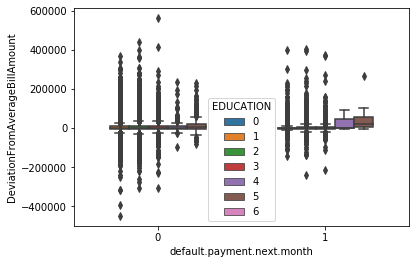

In [142]:
a = ["AverageBillPercentPayed","DeviationFromAverageBillAmount","AverageNonPaymentMonths","DeviationAgeRatio"]

sns.boxplot(x="default.payment.next.month", y= "DeviationFromAverageBillAmount", data=rawData, hue = "EDUCATION")
    

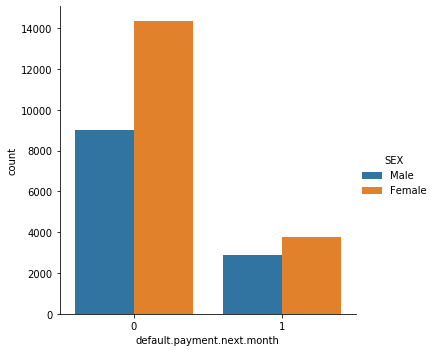

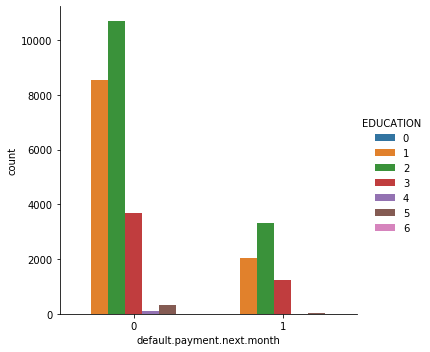

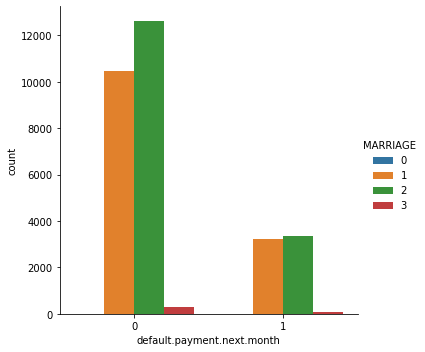

In [123]:

for i in ["SEX","EDUCATION","MARRIAGE"]:
    sns.catplot(x="default.payment.next.month", kind="count", hue = i, data=rawData);

In [ ]:
def createHistogram(DataFrame,columnArray):
    for i in columnArray: 
        DataFrame.hist(column = i)

In [ ]:
createHistogram(rawData, ["SEX","EDUCATION","MARRIAGE","AGE"])

In [ ]:
from sklearn import tree


featureData=rawData.drop("default.payment.next.month", axis=1)
featureData = featureData.drop("ID",axis=1)

featureData= pd.get_dummies(featureData)
featureData=featureData.dropna(how='all').astype(np.float32)
featureData = featureData.replace([np.inf, -np.inf], np.nan).dropna(how="all")

y = rawData["default.payment.next.month"]


for i in list(np.where(~np.isfinite(featureData))):
    y = y.drop(y.index[i])
    featureData = featureData.drop(featureData.index[i])

In [ ]:
from graphviz import Source

dtree=DecisionTreeClassifier()
dtree.fit(featureData,y)

lables = featureData.columns()

graph = Source(tree.export_graphviz(dtree, out_file=None
   , feature_names=labels, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [213]:
df = pd.DataFrame({'s1': ['a', 'b', 'c'], 's2': ['a', 'c', 'd']}, dtype='category')
df

,s1,s2
0,a,a
1,b,c
2,c,d


In [23]:
rawData.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,AverageBillPercentPayed,AverageNonPaymentMonths,DeviationFromAverageBillAmount,DeviationAgeRatio
0,1,20000.0,Female,2,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0.199936,0.666667,3154.8,131.450000
1,2,120000.0,Female,2,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0.806109,0.666667,-197.0,-7.576923
2,3,90000.0,Female,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0.915969,0.000000,14756.2,434.005882
3,4,50000.0,Female,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0.960178,0.000000,10121.2,273.545946
4,5,50000.0,Male,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0.527960,0.000000,-11527.4,-202.235088
5,6,50000.0,Male,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,0.957944,0.000000,29657.2,801.545946
6,7,500000.0,Male,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0,0.927135,0.000000,-103361.0,-3564.172414
7,8,100000.0,Female,2,2,23,0,0,0,0,0,0,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0.741442,0.000000,11554.0,502.347826
8,9,140000.0,Female,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0,0.874856,0.333333,499.6,17.842857
9,10,20000.0,Male,3,2,35,0,0,0,0,0,0,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0,0.183857,0.000000,-5383.8,-153.822857


In [43]:
OrdinalVar[1]

'PAY_2'